# Stac installation and test


<hr id="install">

## Install Stac

In [ ]:
!pip install git+https://github.com/abdullahkhalids/stac

__*Restart the kernel*__ (check "Kernel" menu) to apply the changes to the current notebook.

<hr id="check">

## Check Stac installation

Make sure all the following commands run.

In [3]:
import stac
cd = stac.CommonCodes.generate_code("[[7,1,3]]")
cd.generator_matrix

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]])

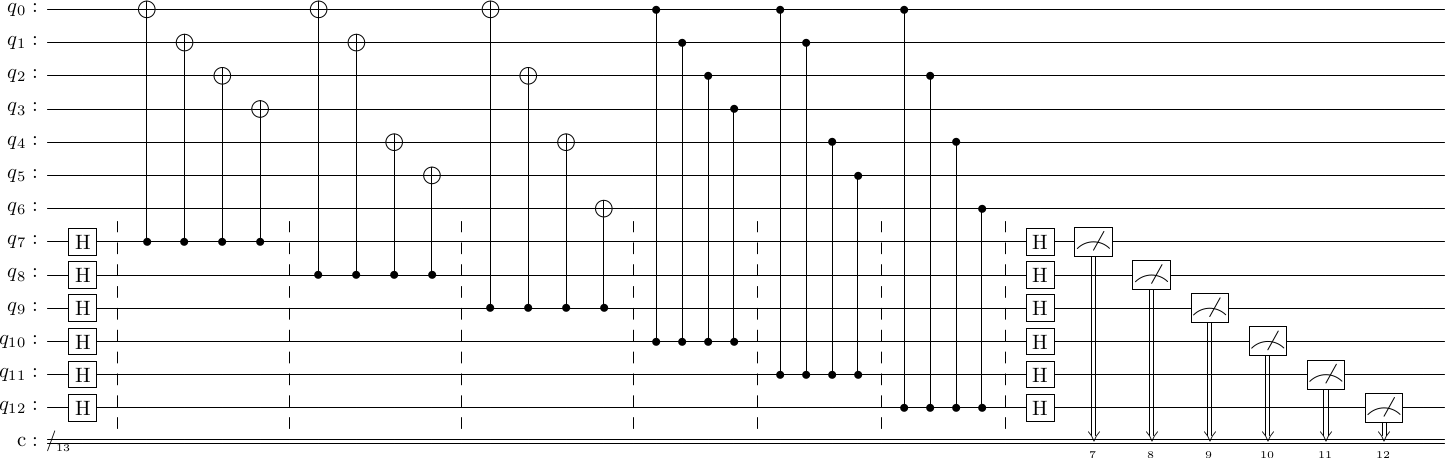

In [5]:
circ = cd.construct_syndrome_circuit()
circ.draw()
# if this fails, try
# circ.draw(output='mpl')

In [6]:
circ.simulate()

        basis    amplitude
-------------  -----------
0000000101000        0.354
1111000101000       -0.354
1100110101000        0.354
0011110101000       -0.354
1010101101000       -0.354
0101101101000        0.354
0110011101000       -0.354
1001011101000        0.354


In [7]:
circ.sample()

[0 0 1 0 0 0]


## A short guide to stac

Stac allows you to build circuits, very much the same way qiskit or cirq does. A circuit can be created in the following way.

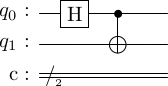

In [6]:
import stac
# create circuit object.
# you don't have to specify the number of qubits or classical bits
circ = stac.Circuit()
# operations are added with the append method
circ.append('H', 0)
circ.append('CX', 0, 1)

# you can draw the circuit using the draw method
circ.draw()

In [8]:
# you can simulate a circuit using qiskit's statevector simulator like so
# this will present the output state in a nice readable form
circ.simulate()

  basis    amplitude
-------  -----------
     00        0.707
     11        0.707


In [10]:
# or you can use stim https://github.com/quantumlib/Stim/
# to sample from the circuit

# first add measurements to the circuit
circ.append('M', 0)
circ.append('M', 1)
circ.sample(10)

[0 0]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]
[1 1]
[0 0]
[0 0]
[0 0]


Stac is mainly designed to work with quantum codes. There are some inbuilt codes.

In [12]:
code = stac.CommonCodes.generate_code('[[7,1,3]]')

# A code object has many methods
dir(code)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_construct_syndrome_circuit_cat',
 '_construct_syndrome_circuit_simple',
 'check_valid_code',
 'construct_decoding_circuit',
 'construct_encoding_circuit',
 'construct_logical_operators',
 'construct_standard_form',
 'construct_syndrome_circuit',
 'decoding_circuit',
 'destab_gen_mat',
 'distance',
 'encoding_circuit',
 'find_destabilizers',
 'generator_matrix',
 'generators_qasm',
 'generators_to_qasm',
 'generators_x',
 'generators_z',
 'logical_xs',
 'logical_zs',
 'num_generators',
 'num_logical_qubits',
 'num_physical_qubits',
 'rankx',
 'standard_generator_matrix',
 'standard_generators_x',
 'standard_generators_z'

In [14]:
# the generator matrix here is 
gm = code.generator_matrix
stac.print_matrix(gm, augmented=True)

<IPython.core.display.Math object>

In [15]:
# you can also create your own codes with a generator matrix
# of your choice. Here I am just using the same one.
code2 = stac.Code(gm)